## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [1]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [2]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [3]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [4]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [5]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [6]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [7]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [8]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [9]:
target = 'survived'

In [10]:
for col in data.columns:
    print(col)
    print(data[col].value_counts())

pclass
3    709
1    323
2    277
Name: pclass, dtype: int64
survived
0    809
1    500
Name: survived, dtype: int64
sex
male      843
female    466
Name: sex, dtype: int64
age
24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: age, Length: 98, dtype: int64
sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64
parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64
fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
9.6875      1
15.5792     1
12.0000     1
7.8750      1
Name: fare, Length: 281, dtype: int64
cabin
F       8
C23     6
G6      5
B57     5
C78     4
       ..
B102    1
B39     1
D40     1
D34     1
F38     1
Name: cabin, Length: 181, dtype: int64
embarked
S    914
C    270
Q    123
Name: embarked, dtype: int64
title
Mr 

In [11]:
vars_num = ['pclass','age','sibsp','parch','fare']# fill your code here

vars_cat = ['sex','cabin','embarked','title']# fill your code here

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

print(data[vars_num].head())
print(data[vars_cat].head())
print(data.head())

Number of numerical variables: 5
Number of categorical variables: 4
   pclass      age  sibsp  parch      fare
0       1  29.0000      0      0  211.3375
1       1   0.9167      1      2  151.5500
2       1   2.0000      1      2  151.5500
3       1  30.0000      1      2  151.5500
4       1  25.0000      1      2  151.5500
      sex cabin embarked   title
0  female    B5        S    Miss
1    male   C22        S  Master
2  female   C22        S    Miss
3    male   C22        S      Mr
4  female   C22        S     Mrs
   pclass  survived     sex      age  sibsp  parch      fare cabin embarked  \
0       1         1  female  29.0000      0      0  211.3375    B5        S   
1       1         1    male   0.9167      1      2  151.5500   C22        S   
2       1         0  female   2.0000      1      2  151.5500   C22        S   
3       1         0    male  30.0000      1      2  151.5500   C22        S   
4       1         0  female  25.0000      1      2  151.5500   C22        S   

 

### Find missing values in variables

In [12]:
# first in numerical variables
data[vars_num].isna().sum()


pclass      0
age       263
sibsp       0
parch       0
fare        1
dtype: int64

In [13]:
# now in categorical variables
data[vars_cat].isna().sum()


sex            0
cabin       1014
embarked       2
title          0
dtype: int64

### Determine cardinality of categorical variables

In [14]:
cardinalilty_cat_vars = {}
for var in vars_cat:
    cardinality = len(data[var].value_counts(dropna=False))
    cardinalilty_cat_vars[var] = cardinality
print(cardinalilty_cat_vars)

{'sex': 2, 'cabin': 182, 'embarked': 4, 'title': 5}


### Determine the distribution of numerical variables

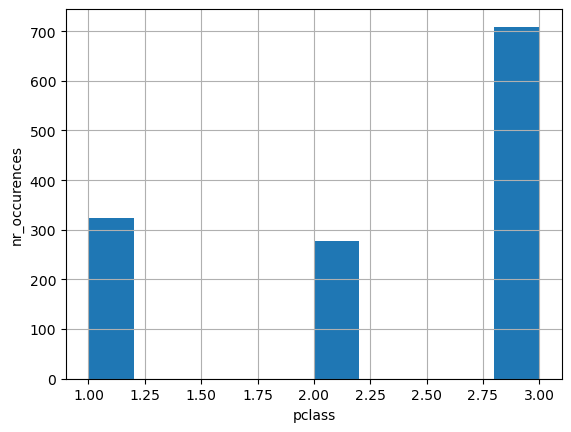

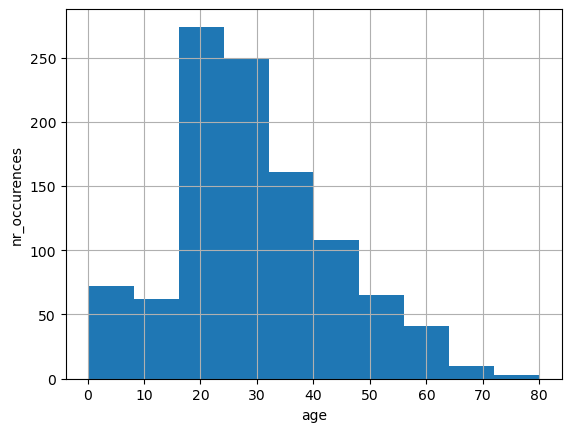

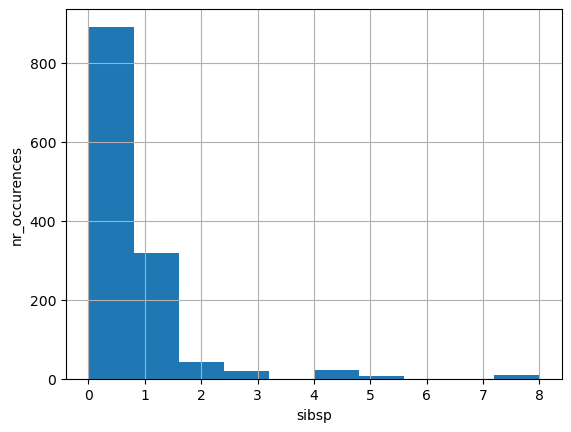

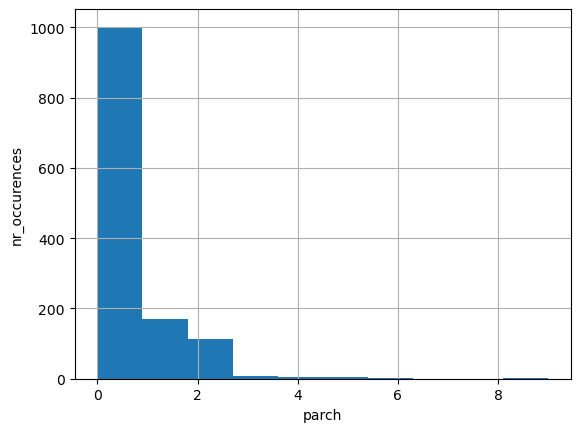

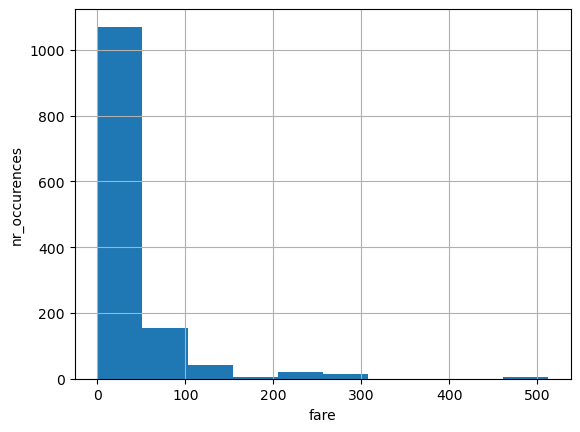

In [15]:
for var in vars_num:
    data[var].hist()
    plt.xlabel(var)
    plt.ylabel('nr_occurences')
    plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [17]:
X_train['cabin'] = X_train['cabin'].apply(lambda x: str(x)[0])
X_test['cabin'] = X_test['cabin'].apply(lambda x: str(x)[0])

### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [18]:
var_missing = ['age','fare']
for var in var_missing:
    #add binary missing indicator
    X_train[var + '_na'] = np.where(X_train[var].isna(),1,0)
    X_test[var + '_na'] = np.where(X_test[var].isna(),1,0)
    #fill na with median on train data
    median_ = X_train[var].median()
    X_train[var].fillna(median_,inplace=True)
    X_test[var].fillna(median_,inplace=True)
    
print(X_train.head())

      pclass     sex   age  sibsp  parch      fare cabin embarked title  \
1118       3    male  25.0      0      0    7.9250     n        S    Mr   
44         1  female  41.0      0      0  134.5000     E        C  Miss   
1072       3    male  28.0      0      0    7.7333     n        Q    Mr   
1130       3  female  18.0      0      0    7.7750     n        S  Miss   
574        2    male  29.0      1      0   21.0000     n        S    Mr   

      age_na  fare_na  
1118       0        0  
44         0        0  
1072       1        0  
1130       0        0  
574        0        0  


### Replace Missing data in categorical variables with the string **Missing**

In [19]:
X_train.fillna('Missing',inplace=True)
X_test.fillna('Missing',inplace=True)

In [20]:
X_train[vars_cat].isna().sum()

sex         0
cabin       0
embarked    0
title       0
dtype: int64

In [21]:
X_test[vars_cat].isna().sum()

sex         0
cabin       0
embarked    0
title       0
dtype: int64

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [22]:
frac_keep = 0.05
categories_not_rare = {}

for var in vars_cat:
    #find categories that are not rare
    res = X_train[var].value_counts(normalize=True)
    res = res[res>= frac_keep]
    res = list(res.index)
    categories_not_rare[var] = res
    #replace rare categories by 'rare'
    X_train[var] = np.where(X_train[var].isin(res),X_train[var],'Rare')
    X_test[var] = np.where(X_test[var].isin(res),X_test[var],'Rare')
print(categories_not_rare)


{'sex': ['male', 'female'], 'cabin': ['n', 'C'], 'embarked': ['S', 'C', 'Q'], 'title': ['Mr', 'Miss', 'Mrs']}


### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [23]:
#check if train and test have the same unique values for each categorical var
for var in vars_cat:
    print(var)
    print(X_train[var].unique())
    print(X_test[var].unique())

sex
['male' 'female']
['male' 'female']
cabin
['n' 'Rare' 'C']
['n' 'Rare' 'C']
embarked
['S' 'C' 'Q' 'Rare']
['S' 'C' 'Q']
title
['Mr' 'Miss' 'Mrs' 'Rare']
['Mr' 'Miss' 'Rare' 'Mrs']


In [24]:
X_train = pd.get_dummies(X_train,drop_first=True)
X_train

,pclass,age,sibsp,parch,fare,age_na,fare_na,sex_male,cabin_Rare,cabin_n,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1118,3,25.0000,0,0,7.9250,0,0,1,0,1,0,0,1,1,0,0
44,1,41.0000,0,0,134.5000,0,0,0,1,0,0,0,0,0,0,0
1072,3,28.0000,0,0,7.7333,1,0,1,0,1,1,0,0,1,0,0
1130,3,18.0000,0,0,7.7750,0,0,0,0,1,0,0,1,0,0,0
574,2,29.0000,1,0,21.0000,0,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3,0.1667,1,2,20.5750,0,0,0,0,1,0,0,1,0,0,0
835,3,28.0000,0,0,8.0500,1,0,1,0,1,0,0,1,1,0,0
1216,3,28.0000,0,0,7.7333,1,0,0,0,1,1,0,0,0,0,0
559,2,20.0000,0,0,36.7500,0,0,0,0,1,0,0,1,0,0,0


In [25]:
X_test_new = pd.get_dummies(X_test) #full dummy encoding (not k-1 to have most distinct vals as possible)
var_to_add = [var for var in X_train.columns if var not in X_test_new.columns] #variable missing in test data
for var in var_to_add:
    X_test_new[var] = 0 #this variable does not appear in test data --> 0 in its column
X_test_new = X_test_new[X_train.columns] #same order of columns as in train data!
X_test = X_test_new
X_test


,pclass,age,sibsp,parch,fare,age_na,fare_na,sex_male,cabin_Rare,cabin_n,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1139,3,38.0,0,0,7.8958,0,0,1,0,1,0,0,1,1,0,0
533,2,21.0,0,1,21.0000,0,0,0,0,1,0,0,1,0,0,0
459,2,42.0,1,0,27.0000,0,0,1,0,1,0,0,1,1,0,0
1150,3,28.0,0,0,14.5000,1,0,1,0,1,0,0,1,1,0,0
393,2,25.0,0,0,31.5000,0,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,3,22.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0,0
1052,3,28.0,0,0,7.8958,1,0,1,0,1,0,0,1,1,0,0
426,2,30.0,0,0,13.0000,0,0,1,0,1,0,0,1,1,0,0
554,2,26.0,0,0,13.0000,0,0,1,0,1,0,0,1,1,0,0


### Scale the variables

- Use the standard scaler from Scikit-learn

In [26]:
# create scaler
scaler = StandardScaler()

#  fit  the scaler to the train set
scaler.fit(X_train) 

# transform the train and test set

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns
)

In [27]:
X_train

,pclass,age,sibsp,parch,fare,age_na,fare_na,sex_male,cabin_Rare,cabin_n,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
0,0.835808,-0.370162,-0.478911,-0.455423,-0.504782,-0.494921,-0.03092,0.761042,-0.434076,0.551235,-0.319539,-0.043748,0.639650,0.869892,-0.435629,-0.275778
1,-1.542157,0.904029,-0.478911,-0.455423,1.971555,-0.494921,-0.03092,-1.313987,2.303742,-1.814107,-0.319539,-0.043748,-1.563355,-1.149569,-0.435629,-0.275778
2,0.835808,-0.131251,-0.478911,-0.455423,-0.508533,2.020526,-0.03092,0.761042,-0.434076,0.551235,3.129507,-0.043748,-1.563355,0.869892,-0.435629,-0.275778
3,0.835808,-0.927621,-0.478911,-0.455423,-0.507717,-0.494921,-0.03092,-1.313987,-0.434076,0.551235,-0.319539,-0.043748,0.639650,-1.149569,-0.435629,-0.275778
4,-0.353174,-0.051614,0.434422,-0.455423,-0.248980,-0.494921,-0.03092,0.761042,-0.434076,0.551235,-0.319539,-0.043748,0.639650,0.869892,-0.435629,-0.275778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,0.835808,-2.347810,0.434422,1.910970,-0.257295,-0.494921,-0.03092,-1.313987,-0.434076,0.551235,-0.319539,-0.043748,0.639650,-1.149569,-0.435629,-0.275778
1043,0.835808,-0.131251,-0.478911,-0.455423,-0.502337,2.020526,-0.03092,0.761042,-0.434076,0.551235,-0.319539,-0.043748,0.639650,0.869892,-0.435629,-0.275778
1044,0.835808,-0.131251,-0.478911,-0.455423,-0.508533,2.020526,-0.03092,-1.313987,-0.434076,0.551235,3.129507,-0.043748,-1.563355,-1.149569,-0.435629,-0.275778
1045,-0.353174,-0.768347,-0.478911,-0.455423,0.059156,-0.494921,-0.03092,-1.313987,-0.434076,0.551235,-0.319539,-0.043748,0.639650,-1.149569,-0.435629,-0.275778


## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [28]:
clf = LogisticRegression(C=0.0005,random_state=0)
clf.fit(X_train,y_train)
print(clf)

LogisticRegression(C=0.0005, random_state=0)


## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [29]:
#predictions on train data 
X_train_pred = clf.predict(X_train)
X_train_scores = clf.predict_proba(X_train)[:,1]

#predictions on test data 
X_test_pred = clf.predict(X_test)
X_test_scores = clf.predict_proba(X_test)[:,1]

#accuracy
acc_train = accuracy_score(y_train,X_train_pred)
print('accuracy on train data: {}'.format(acc_train))
acc_test = accuracy_score(y_test,X_test_pred)
print('accuracy on test data: {}'.format(acc_test))

#roc-auc
auc_train = roc_auc_score(y_train,X_train_scores)
auc_test = roc_auc_score(y_test,X_test_scores)
print('auc on train data: {}'.format(auc_train))
print('auc on test data: {}'.format(auc_test))


accuracy on train data: 0.7125119388729704
accuracy on test data: 0.7022900763358778
auc on train data: 0.8431723338485316
auc on test data: 0.8354012345679012


That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**